In [ ]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as mtp
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
x= df.iloc[:, 0].values
y= df.iloc[:, 1].values
print(x)
print(y)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

In [ ]:
#Fitting the Simple Linear Regression model to the training dataset
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train.reshape(-1,1), y_train.reshape(-1,1)) #training

LinearRegression()

In [ ]:
regressor.intercept_ #y=a +bx

array([26816.19224403])

In [ ]:
regressor.coef_

array([[9345.94244312]])

In [ ]:
y_pred= regressor.predict(x_test.reshape(-1,1))

In [ ]:
import pandas as pd
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,37731.0,40835.105909
1,122391.0,123079.399408
2,57081.0,65134.556261
3,63218.0,63265.367772
4,116969.0,115602.645454
5,109431.0,108125.891499
6,112635.0,116537.239698
7,55794.0,64199.962017
8,83088.0,76349.687193
9,101302.0,100649.137545


In [ ]:
from sklearn import metrics
r2=metrics.r2_score(y_test, y_pred) #R2
print("R2{}",r2)

R2{} 0.9749154407708353


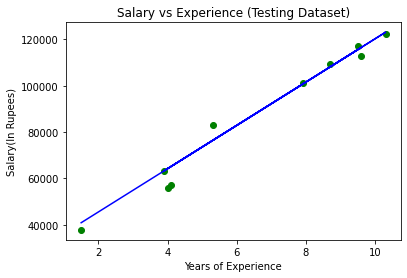

In [ ]:
mtp.scatter(x_test, y_test, color="green") #actual testing data
mtp.plot(x_test, y_pred, color="blue") #prediction line
mtp.title("Salary vs Experience (Testing Dataset)")
mtp.xlabel("Years of Experience")
mtp.ylabel("Salary(In Rupees)")
mtp.show()

### Multiple Regression

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [ ]:
house = datasets.load_boston()
print(house.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(house.data, house.target, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(train_x, train_y)
pred_y = lr.predict(test_x)

In [ ]:
import pandas as pd
df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': pred_y.flatten()})
# df

In [ ]:
print(lr.intercept_) #y-intercept a
print(lr.coef_)
print(lr.coef_.shape) # y=a+b1x1+b2x2+.....b13x13

30.246750993923925
[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
(13,)


In [ ]:
import numpy as np
from sklearn import metrics
r2=metrics.r2_score(test_y, pred_y)
print("R2{}",r2) #0 to 1

R2{} 0.7827881867259447


In [ ]:
#Logistic Regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [ ]:
cancer = datasets.load_breast_cancer()
print(cancer.target_names)
train_x, test_x, train_y, test_y = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=0)

['malignant' 'benign']


In [ ]:
lr = LogisticRegression()
lr.fit(train_x, train_y) #training

pred_y = lr.predict(test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
pred_y

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
print("intercept:")
print(lr.intercept_)
print("slopes:")
print(lr.coef_)

intercept:
[0.30547529]
slopes:
[[ 1.54615305  0.29191629  0.05668431 -0.00356501 -0.06250337 -0.29448142
  -0.39900524 -0.16568097 -0.11529589 -0.01931544  0.08412249  0.61967027
   0.40930236 -0.13066202 -0.00365462 -0.0636051  -0.08667829 -0.02021494
  -0.02464317 -0.00538417  1.69127634 -0.41019519 -0.24568275 -0.02201157
  -0.10889961 -0.94636232 -1.18331702 -0.33036875 -0.31991796 -0.09601609]]


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))
print(accuracy_score(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        47
           1       0.97      0.94      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[45  2]
 [ 4 63]]
0.9473684210526315


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


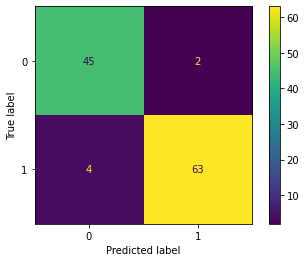

In [ ]:
plot_confusion_matrix(lr, test_x, test_y.reshape(-1, 1))